## 階層的重回帰分析


- 概要
    - 交互作用効果とは
    - 用いるデータの概要と分析目的
- 階層的重回帰分析
    - モデル作成
    - 階層的重回帰分析の実行決定係数の増分に関する検定
    - AICとBICによるモデル比較
- 重回帰分析での交互作用効果の検討
    - 交互作用効果を検討するためのモデル
    - 中心化
    - 交互作用効果の検討
    - 標準偏回帰係数の算出
- 単純傾斜分析
    - 単純傾斜分析の方法
    - 単純傾斜分析の実行
    - 交互作用効果のグラフ化
- 報告例
- 重回帰分析における変数選択
    - 変数選択とは
    - 変数選択の実行
- その他
    - セイバーメトリクス

### 交互作用効果とは
<div style = "color:red">ある説明変数の影響が別の説明変数によって異なること。</div>
階層的重回帰分析による交互作用効果の検討、および交互作用効果が有意のときの単純傾斜分析、変数選択が主に利用される。

In [1]:
#markdownテーブルの左寄せ
library(IRdisplay)
IRdisplay::display_html('<style> table {float:left}</style>')

### 用いるデータの概要と分析目的

#### 教師のストレス経験とバーンアウト(燃え尽き症候群)に関する調査
調査概要:教師300人を対象に3ヶ月の間隔を空けて2回実行し、心理尺度を利用した4件法で回答し、各項目の値の平均値を尺度得点とした。

#### データ概要
 |変数名|説明|
 |:---|:---|
 |ストレス|ストレスを経験した程度を得点化|
 |サポート|ソーシャルサポートを受けた程度を得点化|
 |バーンアウト1|1時点目のバーンアウトの程度を得点化|
|バーンアウト2|2時点目のバーンアウトの程度を得点化|  

#### 分析目的
「ストレス経験とバーンアウトの関係は、ソーシャルサポートを受けている程度によって異なるか」

### 調整変数とは
変数$x$と変数$y$の関係の強さ(回帰係数)に影響を与える変数$m$が存在するときの変数$m$  
回帰係数に対する調整変数の影響を「調整効果」という

### 階層的重回帰分析の特徴
いくつかのステップに分けて重回帰分析を行い、ステップごとにモデルを投入する説明変数を増やしていく。  
ある説明変数を加えることによる説明力の増分がどの程度であるかを知ることが出来る

### 階層的重回帰分析

### モデル作成
#### 回帰分析の注意事項
回帰分析を行う際は「因果関係の方向性」に注意。  

In [2]:
#データの読み込み
sts <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_04/stress.csv")
head(sts)

ストレス,サポート,バーンアウト1,バーンアウト2
2.9,3.3,2.2,2.3
3.1,3.6,2.7,3.0
2.3,3.5,3.1,3.3
3.7,3.2,3.4,2.7
3.7,3.3,3.7,3.5
2.1,2.8,3.2,3.0


In [3]:
#step1の回帰分析

#バーンアウト1のみを説明変数、バーンアウト2を目的変数で回帰分析
res1 <- lm(バーンアウト2~バーンアウト1, data=sts)
summary(res1)


Call:
lm(formula = バーンアウト2 ~ バーンアウト1, data = sts)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45239 -0.19833  0.03135  0.20417  1.17010 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.0762     0.1184   9.087   <2e-16 ***
バーンアウト1   0.6125     0.0431  14.211   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3464 on 298 degrees of freedom
Multiple R-squared:  0.4039,	Adjusted R-squared:  0.4019 
F-statistic:   202 on 1 and 298 DF,  p-value: < 2.2e-16


In [4]:
#step2の回帰分析

#ストレスとサポートを説明変数に加えて回帰分析
res2 <- lm(バーンアウト2~バーンアウト1+ストレス+サポート, data=sts)
summary(res2)


Call:
lm(formula = バーンアウト2 ~ バーンアウト1 + ストレス + サポート, 
    data = sts)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45704 -0.18085  0.01779  0.20892  1.17174 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.19234    0.20905   5.704 2.84e-08 ***
バーンアウト1  0.58006    0.04466  12.989  < 2e-16 ***
ストレス       0.07418    0.03452   2.149   0.0324 *  
サポート      -0.08091    0.04770  -1.696   0.0909 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3438 on 296 degrees of freedom
Multiple R-squared:  0.4168,	Adjusted R-squared:  0.4109 
F-statistic: 70.52 on 3 and 296 DF,  p-value: < 2.2e-16


### 決定係数の増分に関する検定
step1における決定係数を$R_1^2$、step2における決定係数を$R_2^2$とした場合の$F$統計量は
$$ F = \frac{(R_2^2 - R_1^2) / (J_2 - J_1)}{(1-R_2^2) / (N-J_2-1)} $$
($J_1$および$J_2$は説明変数の個数)

In [5]:
#決定係数の増分の検定

#F値の算出
kekka1 <- summary(res1)
kekka2 <- summary(res2)
R2_1 <- kekka1$r.squared
R2_2 <- kekka2$r.squared
J1   <- kekka1$fstatistic["numdf"]    #name属性がある要素は"要素名"でアクセスできる
J2   <- kekka2$fstatistic["numdf"]
N <- nrow(sts)

F <- ( (R2_2-R2_1)/(J2-J1) )/( (1-R2_2)/(N-J2-1) )
names(F) <- NULL    #names属性の"numdf"がくっついているので除去する
F

#p値の算出
1-pf(F, J2-J1, N-J2-1)

[1] 3.264187

[1] 0.0396085

検定の結果から、決定係数の増加は0よりも有意に大きく、新たに変数を加えたことでバーンアウト2の説明力が増加することを示す。

In [6]:
#anovaを用いた決定係数の増分の検定

anova(res1, res2)    #anova(回帰オブジェクト1, 回帰オブジェクト2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
298,35.76472,NA,NA,NA,NA
296,34.99294,2,0.7717804,3.264187,0.0396085


### AICとBICによるモデル比較

In [7]:
#AICの算出
extractAIC(res1)
extractAIC(res2)

#BICの算出
extractAIC(res1, k=log(nrow(sts)))
extractAIC(res2, k=log(nrow(sts)))

[1]    2.0000 -634.0462

[1]    4.0000 -636.5908

[1]    2.0000 -626.6386

[1]    4.0000 -621.7757

AICとBICの結果から、両モデルは実質的にほぼ同一の適合であるといえる。

### 重回帰分析の交互作用効果の検討

#### 交互作用効果を検討するためのモデル

$$
    \mbox{バーンアウト2} = \alpha + \beta_1 \times \mbox{バーンアウト1} + \beta_2 \times \mbox{ストレス} + \beta_3 \times \mbox{サポート}
        + \beta_4 \times \mbox{(ストレス} \times \mbox{サポート)} + \mbox{誤差}
$$

上記の式を変形すると次のようになる。

$$
    \mbox{バーンアウト2} = \alpha + \beta_1 \times \mbox{バーンアウト1} + 
    (\beta_2 + \beta_4 \times \mbox{サポート}) \times \mbox{ストレス} + \beta_3 \times \mbox{サポート} + \mbox{誤差}
$$

交互作用項を加えた回帰モデルでは、「ストレス」の偏回帰係数が「サポート」の程度によって変化することになる。

#### 中心化

- 交互作用項は元々の変数と高い相関を示すため、単純に変数の積をモデルに投入すると、多重共線性が発生
- 中心化とは、ある変数の特典からその変数の平均値を引くこと
- 中心化する前後で交互作用項の偏回帰係数自体は変わらないが、多重共線性の問題を回避可能

In [8]:
#中心化

sts$ストレス.c <- sts$ストレス-mean(sts$ストレス)    #「ストレス」の中心化
sts$サポート.c <- sts$サポート-mean(sts$サポート)    #「サポート」の中心化

In [9]:
#中心化前後での相関係数の確認

#中心化する前の交互作用項
sts$交互作用 <- sts$ストレス*sts$サポート

#中心化した後の交互作用項
sts$交互作用.c <- sts$ストレス.c*sts$サポート.c

#中心化する前の相関行列
cor(sts[, c("ストレス", "サポート", "交互作用")])

#中心化した後の相関行列
cor(sts[, c("ストレス.c", "サポート.c", "交互作用.c")])

,ストレス,サポート,交互作用
ストレス,1.0000000,0.1180760,0.8481021
サポート,0.1180760,1.0000000,0.6091251
交互作用,0.8481021,0.6091251,1.0000000


,ストレス.c,サポート.c,交互作用.c
ストレス.c,1.00000000,0.1180760,-0.09977173
サポート.c,0.11807601,1.0000000,-0.23594740
交互作用.c,-0.09977173,-0.2359474,1.00000000


#### 交互作用効果の検討

In [10]:
#「バーンアウト1」の中心化
sts$バーンアウト1.c <- sts$バーンアウト1 - mean(sts$バーンアウト1)

res3 <- lm(バーンアウト2~バーンアウト1.c+ストレス.c+サポート.c+ストレス.c*サポート.c, data=sts)
summary(res3)


Call:
lm(formula = バーンアウト2 ~ バーンアウト1.c + ストレス.c + サポート.c + 
    ストレス.c * サポート.c, data = sts)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43353 -0.17514  0.00955  0.21465  1.16380 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.73968    0.01976 138.673   <2e-16 ***
バーンアウト1.c        0.57152    0.04438  12.878   <2e-16 ***
ストレス.c             0.06962    0.03425   2.032   0.0430 *  
サポート.c            -0.11006    0.04864  -2.263   0.0244 *  
ストレス.c:サポート.c -0.15558    0.06121  -2.542   0.0115 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3407 on 295 degrees of freedom
Multiple R-squared:  0.4293,	Adjusted R-squared:  0.4216 
F-statistic: 55.48 on 4 and 295 DF,  p-value: < 2.2e-16


「ストレス」と「サポート」の間で有意な交互作用効果がみられた。

In [11]:
#anovaを用いた決定係数の増分の検定
anova(res2, res3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
296,34.99294,NA,NA,NA,NA
295,34.24297,1,0.7499678,6.460902,0.01153898


決定係数の増分は有意であることが示された。

#### 標準偏回帰係数の算出

交互作用項をモデルに含んでいる場合の標準偏回帰係数を算出する場合は、すべての変数を$z$得点に変換し、$z$得点を用いて重回帰分析を行う。   
交互作用項はz得点を用いて作成する(交互作用項を$z$得点に変換するという意味ではない)。

In [12]:
#標準回帰係数の算出

#データの標準化とデータフレーム化
z.sts <- as.data.frame(scale(sts))    #scale関数は返り値がmatrix型

#標準回帰係数の推定
res3.z <- lm(バーンアウト2~バーンアウト1.c+ストレス.c+サポート.c+ストレス.c*サポート.c, data=z.sts)
summary(res3.z)


Call:
lm(formula = バーンアウト2 ~ バーンアウト1.c + ストレス.c + サポート.c + 
    ストレス.c * サポート.c, data = z.sts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2001 -0.3910  0.0213  0.4792  2.5979 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.01044    0.04410   0.237   0.8130    
バーンアウト1.c        0.59305    0.04605  12.878   <2e-16 ***
ストレス.c             0.09339    0.04595   2.032   0.0430 *  
サポート.c            -0.10445    0.04616  -2.263   0.0244 *  
ストレス.c:サポート.c -0.08873    0.03491  -2.542   0.0115 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7605 on 295 degrees of freedom
Multiple R-squared:  0.4293,	Adjusted R-squared:  0.4216 
F-statistic: 55.48 on 4 and 295 DF,  p-value: < 2.2e-16


### 単純傾斜分析
- 分散分析では一般に交互作用効果が有意であったときに下位検定として単純効果の検定を行う
- 単純効果の検定に該当するものは「単純傾斜の検定」と呼ばれる

#### 単純傾斜分析の方法
- 中心化した調整変数の得点から「1標準偏差」足した or 引いた変数を作成し、代わりにその変数を用いて重回帰分析を行う(平行移動の考え方)
- その変数を用いて分析して得られる、調整変数に影響される説明変数の偏回帰係数の結果から、目的変数に対する説明変数の効果を知ることが出来る
- 「1標準偏差」は慣例的に利用されている数値で、必ず1標準偏差でなければならないわけではない(Aiken & West, 1991)

#### 単純傾斜分析における重回帰モデル
##### 調整変数の値が大きい場合の説明変数の効果

\begin{eqnarray}
    \mbox{バーンアウト2} = &\alpha& + \beta_1 \times \mbox{バーンアウト1}.c \\
                           &+& \beta_2 \times \mbox{ストレス}.c + \beta_3 \times (\mbox{サポート}.c - SD_{\mbox{サポート}.c}) \\
                           &+& \beta_4 \times \mbox{ストレス}.c \times (\mbox{サポート}.c - SD_{\mbox{サポート}.c}) + \mbox{誤差} \\
                         = &\alpha&+ \beta_1 \times \mbox{バーンアウト1}.c \\  
                           &+& \{\beta_2 + \beta_4 \times (\mbox{サポート}.c - SD_{\mbox{サポート}.c}) \} \times \mbox{ストレス}.c  \\
                           &+& \beta_3 \times (\mbox{サポート}.c - SD_{\mbox{サポート}.c}) + \mbox{誤差}
\end{eqnarray}

$ \{\beta_2 + \beta_4 \times (\mbox{サポート}.c - SD_{\mbox{サポート}.c}) \} $が単純傾斜   

「サポート.c」の値が$SD_{\mbox{サポート}.c}$の場合、

\begin{eqnarray}
    \mbox{バーンアウト2} = \alpha + \beta_1 \times \mbox{バーンアウト1}.c + \beta_2 \times \mbox{ストレス}.c + \mbox{誤差} 
\end{eqnarray}

「バーンアウト1.c」と誤差の平均値は0より、

\begin{eqnarray}
    \mbox{バーンアウト2(予測値)} = \alpha + \beta_2 \times \mbox{ストレス}.c 
\end{eqnarray}

となり、単純傾斜は$\beta_2$に簡略化。  
$\beta_2 \neq 0$であればソーシャルサポートが多い場合にストレス経験の効果があるといえる。

##### 調整変数の値が小さい場合の説明変数の効果

\begin{eqnarray}
    \mbox{バーンアウト2} = &\alpha&+ \beta_1 \times \mbox{バーンアウト1}.c \\  
                           &+& \{\beta_2 + \beta_4 \times (\mbox{サポート}.c + SD_{\mbox{サポート}.c}) \} \times \mbox{ストレス}.c  \\
                           &+& \beta_3 \times (\mbox{サポート}.c + SD_{\mbox{サポート}.c}) + \mbox{誤差}
\end{eqnarray}

#### 単純傾斜分析の実行

In [13]:
#ソーシャルサポートが多い(調整変数の値が大きい)場合のバーンアウトに対するストレス経験の効果

sts$サポート.h <- sts$サポート.c -sd(sts$サポート.c)
res3.h <- lm(バーンアウト2~バーンアウト1.c+ストレス.c+サポート.h+ストレス.c*サポート.h, data=sts)
summary(res3.h)


Call:
lm(formula = バーンアウト2 ~ バーンアウト1.c + ストレス.c + サポート.h + 
    ストレス.c * サポート.h, data = sts)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43353 -0.17514  0.00955  0.21465  1.16380 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.692885   0.028283  95.213   <2e-16 ***
バーンアウト1.c        0.571517   0.044378  12.878   <2e-16 ***
ストレス.c             0.003473   0.044090   0.079   0.9373    
サポート.h            -0.110063   0.048636  -2.263   0.0244 *  
ストレス.c:サポート.h -0.155585   0.061210  -2.542   0.0115 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3407 on 295 degrees of freedom
Multiple R-squared:  0.4293,	Adjusted R-squared:  0.4216 
F-statistic: 55.48 on 4 and 295 DF,  p-value: < 2.2e-16


切片とストレス.c以外は偏回帰係数に変化なし。  
「ストレス」が統計的に有意でなく、「サポート」が多い場合はストレス経験とバーンアウトの間には関連がないといえる。

In [14]:
#ソーシャルサポートが少ない(調整変数の値が小さい)場合のバーンアウトに対するストレス経験の効果

sts$サポート.l <- sts$サポート.c + sd(sts$サポート.c)
res3.l <- lm(バーンアウト2~バーンアウト1.c+ストレス.c+サポート.l+ストレス.c*サポート.l, data=sts)
summary(res3.l)


Call:
lm(formula = バーンアウト2 ~ バーンアウト1.c + ストレス.c + サポート.l + 
    ストレス.c * サポート.l, data = sts)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43353 -0.17514  0.00955  0.21465  1.16380 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.78647    0.02891  96.383  < 2e-16 ***
バーンアウト1.c        0.57152    0.04438  12.878  < 2e-16 ***
ストレス.c             0.13577    0.04192   3.239  0.00134 ** 
サポート.l            -0.11006    0.04864  -2.263  0.02436 *  
ストレス.c:サポート.l -0.15558    0.06121  -2.542  0.01154 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3407 on 295 degrees of freedom
Multiple R-squared:  0.4293,	Adjusted R-squared:  0.4216 
F-statistic: 55.48 on 4 and 295 DF,  p-value: < 2.2e-16


サポートが多い場合と同様に切片とストレス.c以外は偏回帰係数に変化なし。  
「ストレス」が統計的に有意であり、「サポート」が少ない場合はストレス経験とバーンアウトの間には正の関連がある。

#### 交互作用効果のグラフ化

プリーチャー氏のWebサイト(http://www.quantpsy.org/index.htm)から作成可能    
単純傾斜分析(http://www.quantpsy.org/interact/mlr2.htm)  
単純傾斜分析の結果、グラフ作成のRコード、信頼帯グラフのRコードの3つが出力される

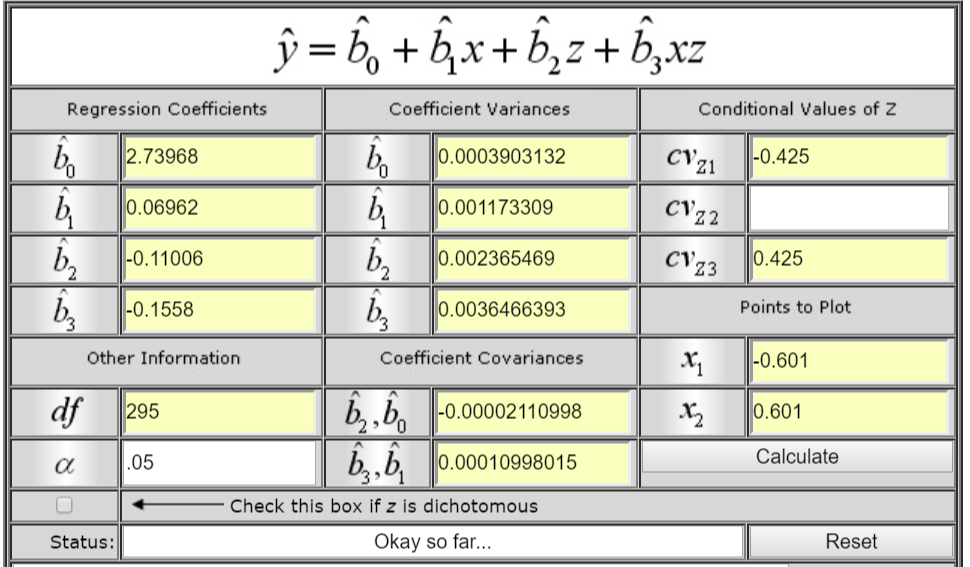

x:説明変数  
z:調整変数  
coefficient variances & covariances:切片と偏回帰係数の分散・共分散(vcov(回帰オブジェクト)で出力可能)  
conditional values of z:調整変数の平均値±1標準偏差  
points to plot:説明へ数の平均値±1標準偏差

##### 単純傾斜分析の結果の出力

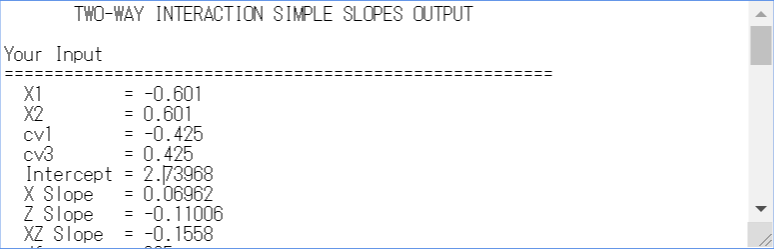

In [15]:
#TWO-WAY INTERACTION SIMPLE SLOPES OUTPUT
#
#Your Input
#=======================================================
#X1        = -0.601
#X2        = 0.601
#cv1       = -0.425
#cv3       = 0.425
#Intercept = 2.73968
#X Slope   = 0.06962
#Z Slope   = -0.11006
#XZ Slope  = -0.1558
#df        = 295
#alpha     = 0.05
#
#Asymptotic (Co)variances
#=======================================================
#var(b0) 0.00039031
#var(b1) 0.00117331
#var(b2) 0.00236547
#var(b3) 0.00364664
#cov(b2,b0) -0.00002111
#cov(b3,b1) 0.00010998
#
#Region of Significance
#=======================================================
#Z at lower bound of region = 0.0135
#Z at upper bound of region = 2.2078
#(simple slopes are significant *outside* this region.)
#
#Simple Intercepts and Slopes at Conditional Values of Z
#=======================================================
#At Z = cv1...
#simple intercept = 2.7865(0.0289), t=96.3993, p=0
#simple slope     = 0.1358(0.0417), t=3.2578, p=0.0013
#At Z = cv3...
#simple intercept = 2.6929(0.0283), t=95.2304, p=0
#simple slope     = 0.0034(0.0439), t=0.0776, p=0.9382
#
#Simple Intercepts and Slopes at Region Boundaries
#=======================================================
#Lower Bound...    
#simple intercept = 2.7382(0.0198), t=138.6229, p=0
#simple slope     = 0.0675(0.0343), t=1.968, p=0.05
#Upper Bound...    
#simple intercept = 2.4967(0.1088), t=22.9574, p=0
#simple slope     = -0.2744(0.1394), t=-1.968, p=0.05
#
#Points to Plot
#=======================================================
#Line for cv1:  From {X=-0.601, Y=2.7048} to {X=0.601, Y=2.8681}
#Line for cv3:  From {X=-0.601, Y=2.6909} to {X=0.601, Y=2.695}
#

##### 単純傾斜分析の結果のグラフのコードの出力

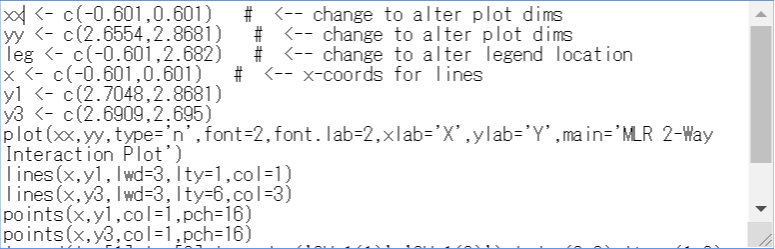

##### 信頼帯のグラフのRコードの出力

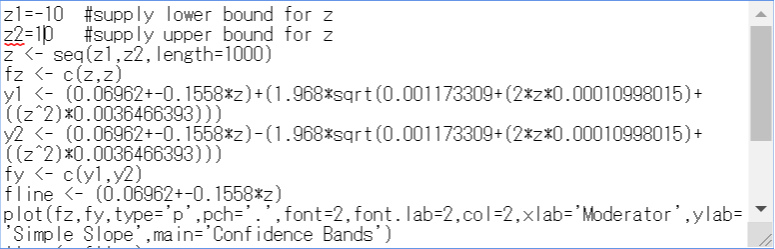

In [16]:
#切片と偏回帰係数の分散・共分散の出力(引数は回帰オブジェクト)
vcov(res3)

,(Intercept),バーンアウト1.c,ストレス.c,サポート.c,ストレス.c:サポート.c
(Intercept),3.903132e-04,-6.187194e-06,-3.304370e-06,-2.110998e-05,-0.0001126490
バーンアウト1.c,-6.187194e-06,1.969394e-03,-3.894822e-04,3.687636e-04,0.0002057825
ストレス.c,-3.304370e-06,-3.894822e-04,1.173309e-03,-2.280577e-04,0.0001099015
サポート.c,-2.110998e-05,3.687636e-04,-2.280577e-04,2.365469e-03,0.0007021057
ストレス.c:サポート.c,-1.126490e-04,2.057825e-04,1.099015e-04,7.021057e-04,0.0037466393


#### 交互作用効果のグラフ化

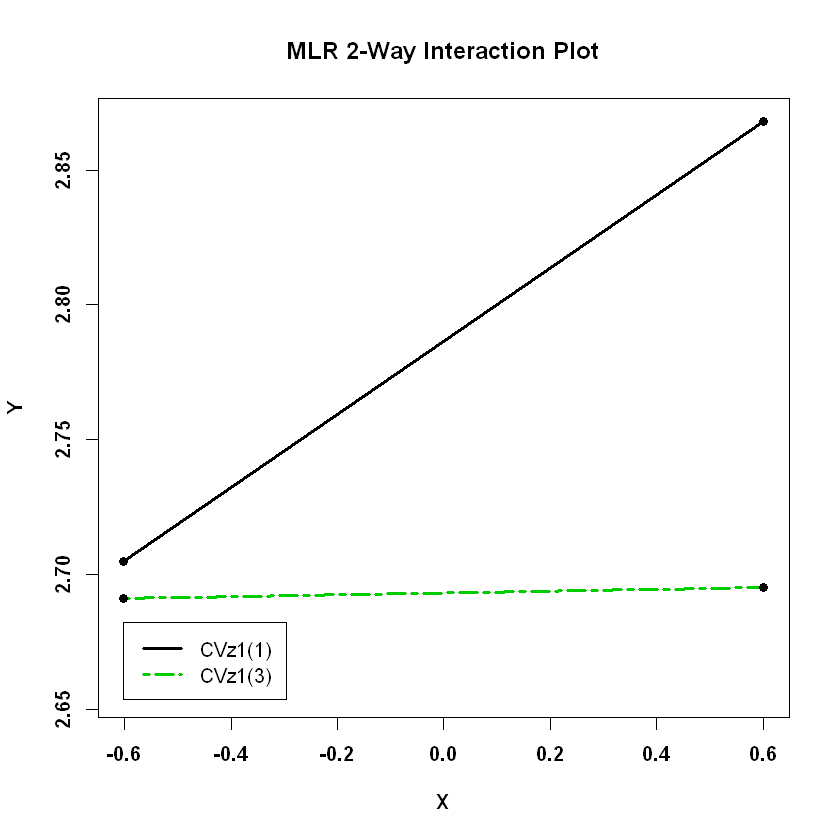

In [17]:
xx <- c(-0.601,0.601)   #  <-- change to alter plot dims
yy <- c(2.6554,2.8681)   #  <-- change to alter plot dims
leg <- c(-0.601,2.682)   #  <-- change to alter legend location
x <- c(-0.601,0.601)   #  <-- x-coords for lines
y1 <- c(2.7048,2.8681)
y3 <- c(2.6909,2.695)
plot(xx,yy,type='n',font=2,font.lab=2,xlab='X',ylab='Y',main='MLR 2-Way Interaction Plot')
lines(x,y1,lwd=3,lty=1,col=1)
lines(x,y3,lwd=3,lty=6,col=3)
points(x,y1,col=1,pch=16)
points(x,y3,col=1,pch=16)
legend(leg[1],leg[2],legend=c('CVz1(1)','CVz1(3)'),lwd=c(3,3),lty=c(1,6),col=c(1,3))

##### 信頼帯のグラフ化

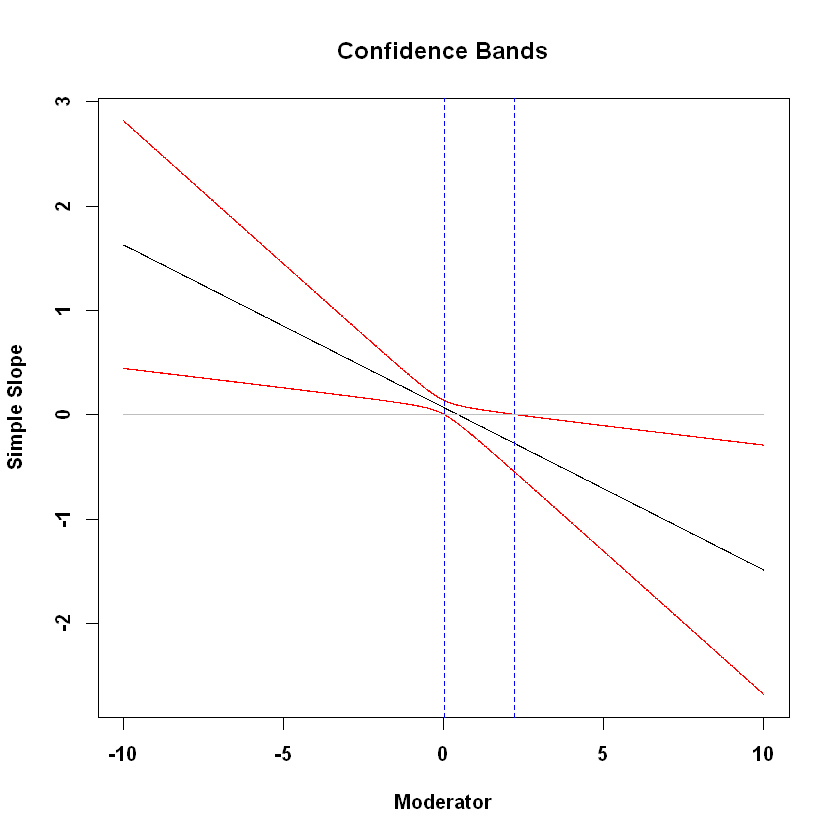

In [18]:
z1=-10  #supply lower bound for z
z2=10   #supply upper bound for z
z <- seq(z1,z2,length=1000)
fz <- c(z,z)
y1 <- (0.06962+-0.1558*z)+(1.968*sqrt(0.001173309+(2*z*0.00010998015)+((z^2)*0.0036466393)))
y2 <- (0.06962+-0.1558*z)-(1.968*sqrt(0.001173309+(2*z*0.00010998015)+((z^2)*0.0036466393)))
fy <- c(y1,y2)
fline <- (0.06962+-0.1558*z)
plot(fz,fy,type='p',pch='.',font=2,font.lab=2,col=2,xlab='Moderator',ylab='Simple Slope',main='Confidence Bands')
lines(z,fline)
f0 <- array(0,c(1000))
lines(z,f0,col=8)
abline(v=0.0135,col=4,lty=2)
abline(v=2.2078,col=4,lty=2)

### 階層的重回帰分析の報告例

　バーンアウトに対する、ストレス経験とソーシャルサポートの交互作用効果を重回帰分析によって検討した。具体的には、2時点目のバーンアウトを目的変数とし、説明変数にはステップ1に1時点目のバーンアウト、ステップ2にストレス経験とソーシャルサポート、ステップ3にストレス経験とソーシャルサポートの積を投入し、階層的重回帰分析を行った。推定結果を下表に示す。
 
\begin{array}{lrrr} \hline
	& 推定値 & 標準誤差 & 95\%CI \\ \hline 
    \underline{ステップ1} \\ 
       \quad バーンアウト1 & 0.613 & 0.043 & [\  0.528, \  0.697] \\
       \quad R^2 = .404 \\ \\
    \underline{ステップ2} \\ 
       \quad バーンアウト1 & 0.580 & 0.045 & [\  0.492, \  0.668] \\
       \quad ストレス & 0.074 & 0.035 & [\  0.006, \  0.142] \\
       \quad サポート & -0.081 & 0.048 & [\  -0.175, \  0.113] \\
       \quad R^2 = .417 \\
       \quad \Delta R^2 = .013 \\ \\ 
     \underline{ステップ3} \\ 
       \quad バーンアウト1 & 0.572 & 0.044 & [\  0.484, \  0.659] \\
       \quad ストレス & 0.070 & 0.034 & [\  0.002, \  0.137] \\
       \quad サポート & -0.110 & 0.049 & [\  -0.206, \  -0.014] \\
       \quad ストレス \times サポート & -0.156 & 0.061 & [\  -0.276, \  -0.035] \\
       \quad R^2 = .429 \\
       \quad \Delta R^2 = .012 \\ \hline             
\end{array}

　分析の結果、ステップ2における決定係数の増分は有意であり($\Delta R^2 =.013, \  F(2, 296) = 3.264, \  p < .05)$)、ステップ3における決定係数の増分も有意($\Delta R^2 =.012, \  F(1, 295) = 6.461, \  p < .05 $)。したがって、ストレス経験とソーシャルサポートのの間には有意な交互作用効果があり、ストレス経験がバーンアウトに与える影響は、ソーシャルサポートの程度によって異なることが示唆された。  
　交互作用項効果が有意であったため、単純傾斜分析を行った。具体的には、ソーシャルサポート得点が平均値±1標準偏差である場合のストレス得点にかかる偏回帰係数の値を求めた。その結果、ソーシャルサポートが多い場合には、ストレスを経験してもバーンアウト傾向は変化せず、  
 ($b = 0.003 (95 \%CI   \ [-0.083 0.090]), \ p = .937$)、ソーシャルサポートが少ない場合には、ストレス経験が多いほどバーンアウト傾向が高いことが示された($b = 0.136 (95 \%CI   \ [0.053 0.218]), \ p = .01$)。

In [19]:
#95%信頼区間の算出
confint(res3)

,2.5 %,97.5 %
(Intercept),2.700796678,2.77855916
バーンアウト1.c,0.484180127,0.65885474
ストレス.c,0.002206993,0.13703176
サポート.c,-0.205780322,-0.01434498
ストレス.c:サポート.c,-0.276048148,-0.03512172


### 重回帰分析における変数選択

#### 代表的な変数選択方法
- 変数増加法:切片のみの(説明変数のない)モデルを基準に、予測に有効な説明変数を1つずつ追加していく方法
- 変数減少法:全ての説明変数を用いて予測を行い、予測に寄与しない説明変数を1つずつ削除していく方法
- ステップワイズ法(変数増現法):変数増加法と変数減少法を組み合わせたもので、予測に有効な変数を取り入れ、有効でない変数を削除することを繰り返し、最適に組み合わせを探る方法

#### 変数選択の実行

In [20]:
#サンプルデータの読み込み
bsb <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_04/baseball.csv")
head(bsb)

年俸,打数,安打,打点,本塁打,四球,死球,三振,打率
5600,405,106,52,11,19,6,80,0.262
24400,374,94,63,18,50,4,89,0.251
16700,501,112,90,26,46,5,153,0.224
3200,297,74,51,14,32,6,63,0.249
12200,181,33,27,9,23,1,53,0.182
10600,286,62,55,19,32,1,91,0.217


In [21]:
#stepAICを用いた変数選択のためのMASSライブラリの読み込み
library(MASS)

In [22]:
#ステップワイズ法による変数選択

#初期モデルの作成
base <- lm(年俸~1, data=bsb)

#stepAIC(初期モデル,direction="both or foward or backward", scope=変数選択で検討するモデルの範囲)で変数選択
step.res <- stepAIC(base, direction = "both", scope = list(upper=~打数+安打+打点+本塁打+四球+死球+三振+打率))

Start:  AIC=2649.05
年俸 ~ 1

         Df  Sum of Sq        RSS    AIC
+ 打点    1 3503749452 3415778882 2545.2
+ 四球    1 3229622933 3689905400 2556.7
+ 本塁打  1 3053368364 3866159970 2563.7
+ 安打    1 2969041723 3950486611 2567.0
+ 打数    1 2921935098 3997593236 2568.8
+ 三振    1 1896919774 5022608559 2603.0
+ 打率    1 1106210130 5813318204 2624.9
+ 死球    1  805181461 6114346872 2632.5
<none>                 6919528333 2649.1

Step:  AIC=2545.16
年俸 ~ 打点

         Df  Sum of Sq        RSS    AIC
+ 四球    1  206503859 3209275023 2537.8
+ 安打    1   66173261 3349605621 2544.2
+ 打数    1   49021564 3366757318 2545.0
<none>                 3415778882 2545.2
+ 死球    1   32421711 3383357171 2545.7
+ 本塁打  1   30560838 3385218044 2545.8
+ 三振    1   24002709 3391776172 2546.1
+ 打率    1    7978426 3407800456 2546.8
- 打点    1 3503749452 6919528333 2649.1

Step:  AIC=2537.8
年俸 ~ 打点 + 四球

         Df Sum of Sq        RSS    AIC
+ 三振    1  96098414 3113176609 2535.2
+ 本塁打  1  53868808 3155406215 2537.3
<none>   

In [23]:
#変数選択の結果の確認
summary(step.res)


Call:
lm(formula = 年俸 ~ 四球 + 三振 + 本塁打 + 打数, data = bsb)

Residuals:
   Min     1Q Median     3Q    Max 
 -9221  -2270  -1046    979  15750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1657.861    873.064   1.899  0.05956 .  
四球         107.137     35.415   3.025  0.00294 ** 
三振         -73.716     22.589  -3.263  0.00137 ** 
本塁打       415.479     77.501   5.361 3.19e-07 ***
打数          15.204      5.103   2.979  0.00339 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4510 on 145 degrees of freedom
Multiple R-squared:  0.5737,	Adjusted R-squared:  0.562 
F-statistic: 48.79 on 4 and 145 DF,  p-value: < 2.2e-16
